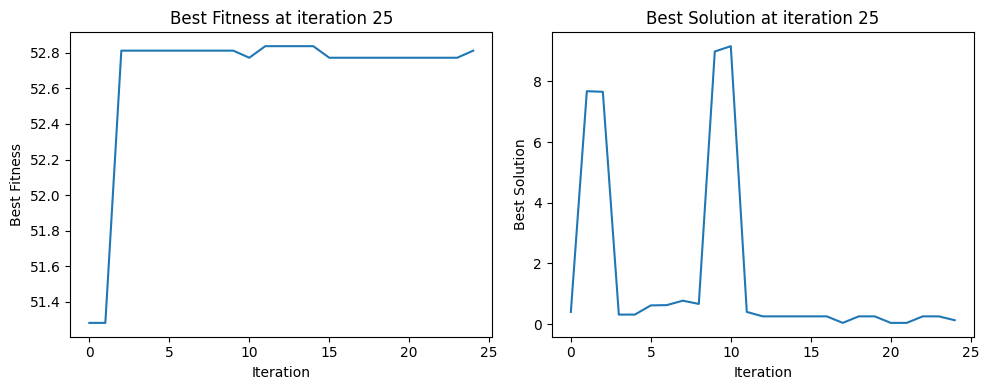

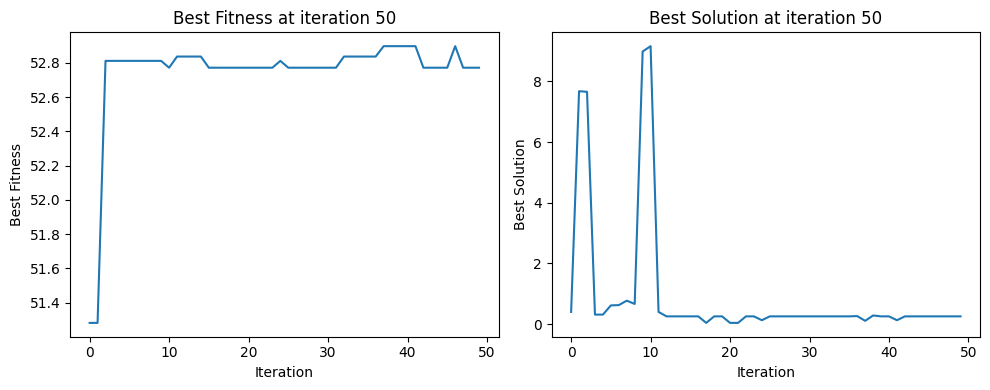

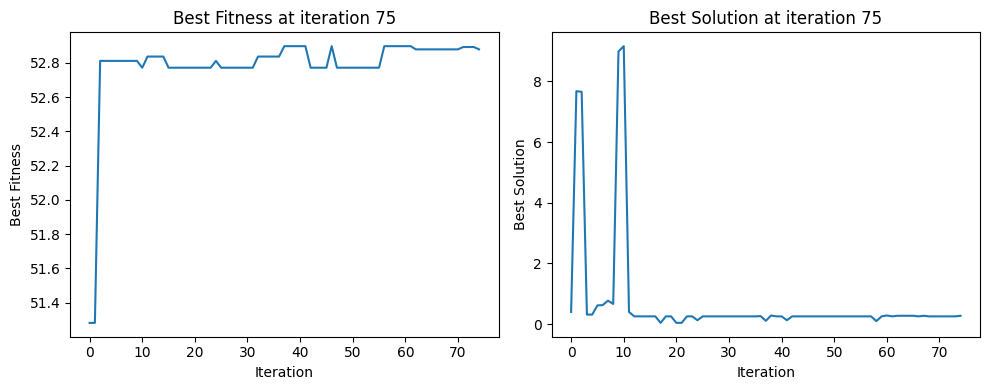

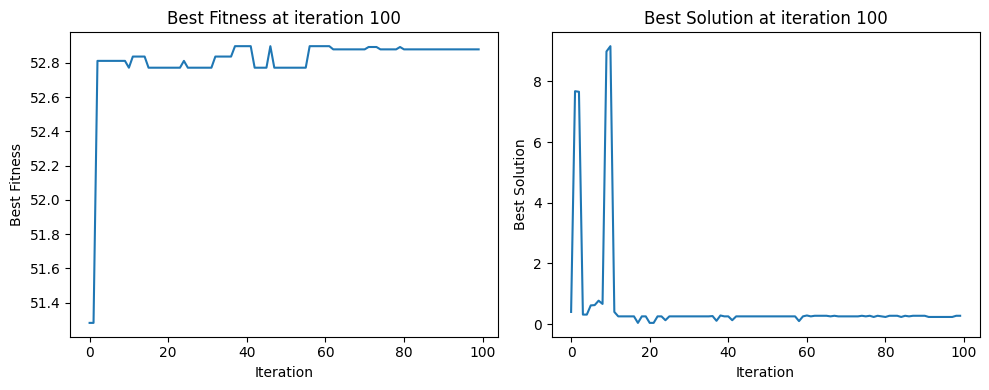

In [5]:
import numpy as np

class GeneticPopulation:

    def __init__(self, population_size, gene_length):
        self.population_size = population_size
        self.gene_length = gene_length
        self.population = np.round(np.random.rand(population_size, gene_length)).astype(int)
        self.fitness_values = np.zeros((population_size, 1))

    def selection(self):
        total_fitness_value = self.fitness_values.sum()
        cumulative_fitness_values = self.fitness_values/total_fitness_value
        cumulative_fitness_values = np.cumsum(cumulative_fitness_values)
        random_points = np.sort(np.random.rand(self.population_size, 1), 0)
        fitness_index = 0
        new_index = 0
        selected_population = np.zeros_like(self.population)
        while new_index < self.population_size:
            if random_points[new_index] < cumulative_fitness_values[fitness_index]:
                selected_population[new_index, :] = self.population[fitness_index, :]
                new_index += 1
            else:
                fitness_index += 1
        self.population = selected_population

    def crossover(self, crossover_rate):
        offspring_population = np.zeros_like(self.population)
        for i in range(0, self.population_size-1, 2):
            if np.random.rand(1) < crossover_rate:
                crossover_point = int(np.round(np.random.rand(1) * self.gene_length).item())
                offspring_population[i, :] = np.concatenate([self.population[i, 0:crossover_point], self.population[i+1, crossover_point:self.gene_length]], 0)
                offspring_population[i+1, :] = np.concatenate([self.population[i+1, 0:crossover_point], self.population[i, crossover_point:self.gene_length]], 0)
            else:
                offspring_population[i, :] = self.population[i, :]
                offspring_population[i + 1, :] = self.population[i + 1, :]
        self.population = offspring_population

    def find_best(self):
        best_solution = self.population[0, :]
        best_fitness = self.fitness_values[0]
        for i in range(1, self.population_size):
            if self.fitness_values[i] > best_fitness:
                best_solution = self.population[i, :]
                best_fitness = self.fitness_values[i]
        return best_solution, best_fitness

    def mutation(self, mutation_rate):
        for i in range(self.population_size):
            if np.random.rand(1) < mutation_rate:
                mutation_point = np.random.randint(self.gene_length)
                if self.population[i, mutation_point] == 1:
                    self.population[i, mutation_point] = 0
                else:
                    self.population[i, mutation_point] = 1

    def convert_binary_to_decimal(self, binary_population):
        temp_population = np.zeros_like(binary_population)
        for i in range(self.gene_length):
            temp_population[:, i] = 2 ** (self.gene_length - i - 1) * binary_population[:, i]
        decimal_population = np.sum(temp_population, 1)
        normalized_population = decimal_population * 10/(1 << self.gene_length)
        return normalized_population

    def calculate_fitness_values(self):
        decimal_values = self.convert_binary_to_decimal(self.population)
        self.fitness_values = 10 * np.sin(5 * decimal_values) + 7 * np.abs(decimal_values - 5) + 10

import matplotlib.pyplot as plt

if __name__ == "__main__":
    crossover_rate = 0.6
    mutation_rate = 0.001
    population_size = 100
    gene_length = 10
    genetic_population = GeneticPopulation(population_size, gene_length)
    
    best_fitnesses = []
    best_solutions = []

    for i in range(100):
        genetic_population.calculate_fitness_values()
        genetic_population.selection()
        genetic_population.crossover(crossover_rate)
        genetic_population.mutation(mutation_rate)
        best_solution, best_fitness = genetic_population.find_best()
        best_solution = np.expand_dims(best_solution, 0)
        decimal_values = genetic_population.convert_binary_to_decimal(best_solution)
        best_fitnesses.append(best_fitness)
        best_solutions.append(decimal_values)

        if (i+1) % 25 == 0:
            plt.figure(figsize=(10, 4))
            plt.subplot(121)
            plt.plot(best_fitnesses)
            plt.title(f'Best Fitness at iteration {i+1}')
            plt.xlabel('Iteration')
            plt.ylabel('Best Fitness')

            plt.subplot(122)
            plt.plot(best_solutions)
            plt.title(f'Best Solution at iteration {i+1}')
            plt.xlabel('Iteration')
            plt.ylabel('Best Solution')
            plt.tight_layout()
            plt.show()
